In [19]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

city="Houston"
state="TX"
county="HARRIS COUNTY"
zipcode="7002"

chosen_cities=["Houston, TX", "San Francisco, CA", "New York, NY", "Chicago, IL", "Seattle, WA"]
chosen_zipcodes=["7006", "77004", "77008", "77055"]
chosen_counties=["HARRIS COUNTY", "MONTGOMERY COUNTY", "GALVESTON COUNTY", "TRINITY COUNTY", "FORT BEND COUNTY"]


In [20]:
# ---------------------------------- DATA IMPORT ----------------------------------
# Sourcing data from https://www.zillow.com/research/data/

In [21]:
# Creating a function to pull data from Zillow (in *.csv format)

def pull_zillow_data(url, state, county, city, var_name):
    # Read in data from Zillow live url reference   
    data=pd.read_csv(url)
    
    # Drop rows with NA entries     
    data=data.drop(['RegionID', 'SizeRank'],axis=1)
    
    # Identify columns not containing date reference
    id_vars=data.columns[~data.columns.str.contains('-')]

    # Transpose multiple date columns into Date vs Value format.
    melted_data=pd.melt(data,
                       id_vars=id_vars,
                       var_name="Date",
                       value_name=var_name)
    
    # return transposed df   
    return melted_data
   

In [22]:
# define a rangle of string variables with url links to the live *.csv format data
# --- COST DATA 
# listing price
list_price_data="https://files.zillowstatic.com/research/public_v2/mlp/Metro_mlp_uc_sfrcondo_raw_month.csv"
# sale price
sale_data="https://files.zillowstatic.com/research/public_v2/median_sale_price/Metro_median_sale_price_uc_SFRCondo_raw_month.csv"

# --- INVENTORY DATA
# inventory data (days to pending)
inventory_d2p_data="http://files.zillowstatic.com/research/public_v2/mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv"
# for sale inventory count
inventory_4s_data="https://files.zillowstatic.com/research/public_v2/invt_fs/Metro_invt_fs_uc_sfrcondo_raw_month.csv"

# --- ZILLOW HOUSING VALUE INDEX DATA
# ----------------------------------- DATA BY ZIP CODE -----------------------------------
zhvi_single_family_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_condo_coop_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_5plus_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_4_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_3_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_2_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_1_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"

# ----------------------------------- DATA BY COUNTY -----------------------------------
zhvi_single_family_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_condo_coop_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_5plus_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_4_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_3_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_2_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_1_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"


In [23]:
url_dict=[
# Data by CITY    
    {
        "stat_name"   : "list_price_data",
        "url"         : list_price_data,
        "description" : f"Median List Price: The median price at which homes across various geographies were listed.\nRaw. All homes. Monthly view."
    },
    {   "stat_name"   : "sale_data",
        "url"         : sale_data,
        "description" : f"Median Sale Price: The median price at which homes across various geographies were sold.\nRaw. All homes. Monthly view."
    },
    {   "stat_name"   : "inventory_d2p_data",
        "url"         : inventory_d2p_data,
        "description" : f"Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale."
    },
    {   "stat_name"   : "inventory_4s_data",
        "url"         : inventory_4s_data,
        "description" : f"For-Sale Inventory: The count of unique listings that were active at any time in a given month."
    },
# # Data by ZIP CODE --------------------------- commented out due to memory overload
#     {   "stat_name"   : "zhvi_single_family_homes_by_zip",
#         "url"         : zhvi_single_family_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll single family time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_condo_coop_homes_by_zip",
#         "url"         : zhvi_condo_coop_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll condo/co-op time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_5plus_homes_by_zip",
#         "url"         : zhvi_5plus_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n5+ bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_4_homes_by_zip",
#         "url"         : zhvi_4_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n4 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_3_homes_by_zip",
#         "url"         : zhvi_3_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n3 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_2_homes_by_zip",
#         "url"         : zhvi_2_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n2 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_1_homes_by_zip",
#         "url"         : zhvi_1_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n1 bed time series by Zipcode"
#     },
# Data by COUNTY        
    {   "stat_name"   : "zhvi_single_family_homes_by_county",
        "url"         : zhvi_single_family_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll single family time series by county"
    },
    {   "stat_name"   : "zhvi_condo_coop_homes_by_county",
        "url"         : zhvi_condo_coop_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll condo/co-op time series by county"
    },
    {   "stat_name"   : "zhvi_5plus_homes_by_county",
        "url"         : zhvi_5plus_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n5+ bed time series by county"
    },
    {   "stat_name"   : "zhvi_4_homes_by_county",
        "url"         : zhvi_4_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n4 bed time series by county"
    },
    {   "stat_name"   : "zhvi_3_homes_by_county",
        "url"         : zhvi_3_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n3 bed time series by county"
    },
    {   "stat_name"   : "zhvi_2_homes_by_county",
        "url"         : zhvi_2_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n2 bed time series by county"
    },
    {   "stat_name"   : "zhvi_1_homes_by_county",
        "url"         : zhvi_1_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n1 bed time series by county"}
]

zillow_df=pd.DataFrame(url_dict)
zillow_df['data']=""
zillow_df['type']=""
# zillow_df

In [24]:
# Fill in illowdf dataframe's 'data' clumn with indvidual dataframes for each individual data source
for i, row in zillow_df.iterrows():
    
    url=row['url']
    var_name=zillow_df.loc[i]['stat_name']
    
    #   start filling in 'data' column with df output by pull_zllw_data f-n
    zillow_df.iloc[i]['data']=pull_zillow_data(url, state, county, city, var_name)

#     #   optionally create indemendent standalone data frames   
#     vars()[zillow_df.loc[i]['stat_name']+ "_df"]=zillow_df.iloc[i]['data']
    
    # Label data sources by entity type (zip code, city, county, country etc)    
    if 'County' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='County'
    elif 'Msa' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='City'
    elif 'Zip' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='Zip'
        
    print(f"PROCESSNG................{var_name} ({zillow_df.iloc[i]['data'].shape})")    

PROCESSNG................list_price_data ((4074, 5))
PROCESSNG................sale_data ((15326, 5))
PROCESSNG................inventory_d2p_data ((3840, 5))
PROCESSNG................inventory_4s_data ((4074, 5))
PROCESSNG................zhvi_single_family_homes_by_county ((871568, 9))
PROCESSNG................zhvi_condo_coop_homes_by_county ((533824, 9))
PROCESSNG................zhvi_5plus_homes_by_county ((857584, 9))
PROCESSNG................zhvi_4_homes_by_county ((870048, 9))
PROCESSNG................zhvi_3_homes_by_county ((871568, 9))
PROCESSNG................zhvi_2_homes_by_county ((867920, 9))
PROCESSNG................zhvi_1_homes_by_county ((811072, 9))


In [25]:
# Add an empty column to the data frame as a placeholder for filtred dataframes
zillow_df['data_filtered']=""
zillow_df_temp=zillow_df
zillow_df=zillow_df.set_index("stat_name")
zillow_df

,url,description,data,type,data_filtered
stat_name,,,,,
list_price_data,https://files.zillowstatic.com/research/public...,Median List Price: The median price at which h...,RegionName Regio...,City,
sale_data,https://files.zillowstatic.com/research/public...,Median Sale Price: The median price at which h...,RegionName Regi...,City,
inventory_d2p_data,http://files.zillowstatic.com/research/public_...,Days to Pending: How long it takes homes in a ...,RegionName Regio...,City,
inventory_4s_data,https://files.zillowstatic.com/research/public...,For-Sale Inventory: The count of unique listin...,RegionName Regio...,City,
zhvi_single_family_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_condo_coop_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_5plus_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_4_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_3_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,


In [26]:
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_city=pd.DataFrame(zillow_df[zillow_df['type']=='City'])
zillow_df_by_county=pd.DataFrame(zillow_df[zillow_df['type']=='County'])
# zillow_df_by_zip=zillow_df[zillow_df['type']=='Zip']

In [27]:
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_city=pd.DataFrame(zillow_df[zillow_df['type']=='City'])

counter=0

# Filter out chosen cities
for i, row in zillow_df_by_city.iterrows():
    d=row['data']
    # convert Date to datetime format
    d['Date']=d['Date'].astype('datetime64[ns]')
    
    # check if current city is among the list of chosen cities
    city_filter = d['RegionName'].isin(chosen_cities)
    
    # place filtered out data frame into respective higher level data frame cell
    zillow_df_by_city.loc[row.name]['data_filtered']=d[city_filter].sort_values(by='RegionName')
    
    # initialize the new df with data for the first city
    if counter<1 :
        zillow_df_by_city_merged=zillow_df_by_city.loc[row.name]['data_filtered']
        counter+=1
    # merge data for the remaining cities
    else :    
        zillow_df_by_city_merged=pd.merge(zillow_df_by_city_merged,
                                          zillow_df_by_city.loc[row.name]['data_filtered'],
                                          on=['RegionName','RegionType','StateName','Date'])    
zillow_df_by_city

,url,description,data,type,data_filtered
stat_name,,,,,
list_price_data,https://files.zillowstatic.com/research/public...,Median List Price: The median price at which h...,RegionName Regio...,City,RegionName RegionType StateName D...
sale_data,https://files.zillowstatic.com/research/public...,Median Sale Price: The median price at which h...,RegionName Regi...,City,RegionName RegionType StateName ...
inventory_d2p_data,http://files.zillowstatic.com/research/public_...,Days to Pending: How long it takes homes in a ...,RegionName Regio...,City,RegionName RegionType StateName D...
inventory_4s_data,https://files.zillowstatic.com/research/public...,For-Sale Inventory: The count of unique listin...,RegionName Regio...,City,RegionName RegionType StateName D...


In [28]:
# Testing pulling out individual dataframe
# zillow_df_by_city.loc['list_price_data','data_filtered'].head(3)

In [29]:
# Change 'Date' column tipe to datetime
zillow_df_by_city_merged['Date']=pd.to_datetime(zillow_df_by_city_merged['Date'])
# Create date related columns for Year, Months, Day of the week (both string and 
# numeric equivalents) 
zillow_df_by_city_merged['Year']=zillow_df_by_city_merged['Date'].dt.year
zillow_df_by_city_merged['Month']=zillow_df_by_city_merged['Date'].dt.strftime('%b')
zillow_df_by_city_merged['MonthNumeric']=zillow_df_by_city_merged['Date'].dt.month
zillow_df_by_city_merged['DayOfTheWeek']=zillow_df_by_city_merged['Date'].dt.strftime('%A')
zillow_df_by_city_merged['DayOfTheWeekNumeric']=zillow_df_by_city_merged['Date'].dt.strftime('%w')
# Rename a column for clearer labeling
zillow_df_by_city_merged = zillow_df_by_city_merged.rename(columns = {'RegionName': 'City'})
# Export final df to csv file for external analysis
zillow_df_by_city_merged.to_csv("summary_csv/zillow_df_by_city_merged.csv",
                                  index=False)
zillow_df_by_city_merged

,City,RegionType,StateName,Date,list_price_data,sale_data,inventory_d2p_data,inventory_4s_data,Year,Month,MonthNumeric,DayOfTheWeek,DayOfTheWeekNumeric
0,"Chicago, IL",Msa,IL,2019-04-30,347500.0,241500.0,47.0,58354.0,2019,Apr,4,Tuesday,2
1,"Chicago, IL",Msa,IL,2021-03-31,349900.0,270000.0,NaN,33668.0,2021,Mar,3,Wednesday,3
2,"Chicago, IL",Msa,IL,2018-06-30,344900.0,250000.0,42.0,58684.0,2018,Jun,6,Saturday,6
3,"Chicago, IL",Msa,IL,2020-04-30,329000.0,260000.0,56.0,44743.0,2020,Apr,4,Thursday,4
4,"Chicago, IL",Msa,IL,2018-07-31,335000.0,244000.0,46.0,59813.0,2018,Jul,7,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,"Seattle, WA",Msa,WA,2019-09-30,620000.0,483875.0,30.0,13450.0,2019,Sep,9,Monday,1
191,"Seattle, WA",Msa,WA,2019-08-31,624900.0,490493.0,30.0,13993.0,2019,Aug,8,Saturday,6
192,"Seattle, WA",Msa,WA,2019-06-30,648000.0,505000.0,24.0,15235.0,2019,Jun,6,Sunday,0
193,"Seattle, WA",Msa,WA,2019-05-31,649950.0,515000.0,19.0,14424.0,2019,May,5,Friday,5


PROCESSING_______________________Houston, TX


<ipython-input-30-98d46e5bd9f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________San Francisco, CA


<ipython-input-30-98d46e5bd9f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________New York, NY


<ipython-input-30-98d46e5bd9f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Chicago, IL


<ipython-input-30-98d46e5bd9f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Seattle, WA


<ipython-input-30-98d46e5bd9f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


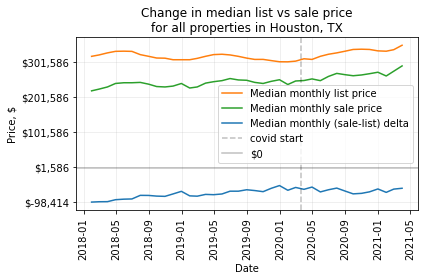

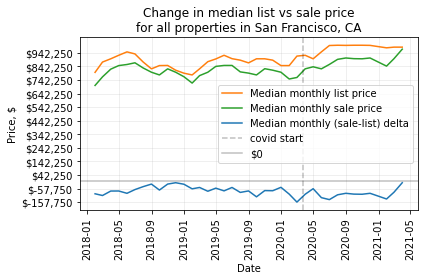

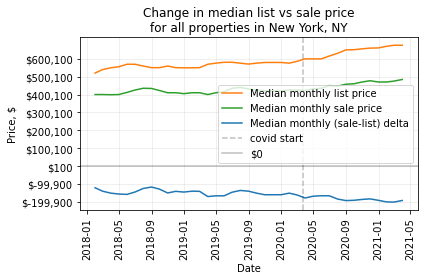

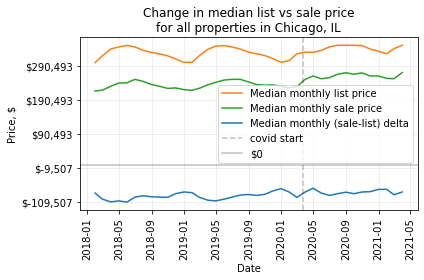

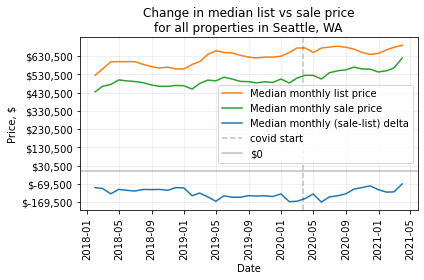

In [30]:
#--------------------------- Plotting and saving figures for change ------------------------ 
# --------------------------- in median list & sale price by city -------------------------- 

# cycle through each one of the chosen cities, create and save a separate figure for each.
for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[
        zillow_df_by_city_merged['City']==city]
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')
    
    # set figure dimensions
    plt.figure(figsize=(6, 4))
    # plot listing price data
    plt.plot(zillow_df_by_city_merged_dateindex['Date'],
               zillow_df_by_city_merged_dateindex['list_price_data'],
            'tab:orange', 
             label="Median monthly list price")
    # plot sale price data
    plt.plot(zillow_df_by_city_merged_dateindex['Date'],
               zillow_df_by_city_merged_dateindex['sale_data'],
             'tab:green', 
             label="Median monthly sale price")
    # plot difference between sale and listing data
    plt.plot(zillow_df_by_city_merged_dateindex['Date'],
               zillow_df_by_city_merged_dateindex['sale_data']-zillow_df_by_city_merged_dateindex['list_price_data'],
             'tab:blue', 
             label="Median monthly (sale-list) delta")
    # set axes labels
    plt.xlabel("Date")
    plt.ylabel("Price, $")
    # set title
    plt.title(f"Change in median list vs sale price\nfor all properties in {zillow_df_by_city_merged_dateindex['City'].unique()[0]}")
    # add gridlines and adjust tick and plot formatting
    plt.grid(alpha=0.25)
    plt.xticks(rotation=90)
    y_ticks=np.arange((-zillow_df_by_city_merged_dateindex['list_price_data']+zillow_df_by_city_merged_dateindex['sale_data']).min(),
                      max(zillow_df_by_city_merged_dateindex['list_price_data'].max(),
                          zillow_df_by_city_merged_dateindex['list_price_data'].max()),
                      100000)
    y_labels=pd.DataFrame(y_ticks)[0].map("${:,.0f}".format).to_list()
    plt.yticks(y_ticks,y_labels)
    plt.tight_layout()
    
    # add vertical lines at the approximate date of onset of COVID
    plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.25, label="covid start", linestyle='--')
    # add horizontal line at $0 for price vs price difference differentiation
    plt.axhline(0, c='k', alpha=0.25, label='$0')
    # add legend
    plt.legend()
    
    # reformat city name for use in the formation of *.PNG file name
    city_formatted=city.split(",")[0].replace(" ", "_")
    
    # save figure to *.PNG file
    file_name= "list_vs_sold_price"
    plt.savefig( "figures/" + file_name + "_" + city_formatted +".png")

In [81]:
a=sorted(zillow_df_by_city_merged['Year'].unique())
a

[2018, 2019, 2020, 2021]

PROCESSING_______________________Houston, TX
PROCESSING_______________________San Francisco, CA
PROCESSING_______________________New York, NY
PROCESSING_______________________Chicago, IL
PROCESSING_______________________Seattle, WA


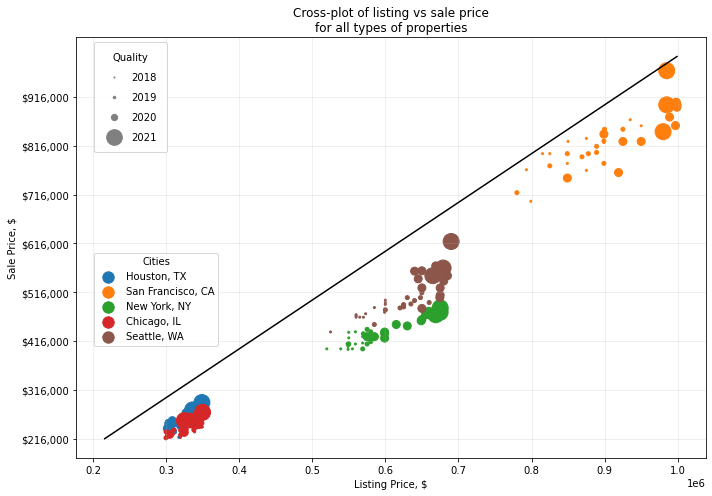

In [151]:
#--------------------------- Plotting and saving figures ------------------------ 
# --------------------------- crossplot of list & sale price by city -------------------------- 

# set figure dimensions
fig, ax = plt.subplots(figsize=(10, 7))
# preset colors for the 5 chosen cities and reset city counter
color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown']
counter=0

# cycle through each one of the chosen cities, create and save a separate figure for each.
for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[zillow_df_by_city_merged['City']==city]
    
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')
    
    # plot listing price vs sale price data
    plt.scatter(zillow_df_by_city_merged_dateindex['list_price_data'],
             zillow_df_by_city_merged_dateindex['sale_data'],
             s=4**(zillow_df_by_city_merged_dateindex['Year']-2017),
             c=color[counter],
             marker='o',
#              linewidth=0,
             label=f"{city}")
    # increment city counter
    counter += 1
    
    plt.xlabel("Listing Price, $")
    plt.ylabel("Sale Price, $")
    # set title
    plt.title(f"Cross-plot of listing vs sale price\nfor all types of properties")
    # add gridlines and adjust tick and plot formatting
    plt.grid(alpha=0.25)
    
    x_ticks=np.arange(
         min(zillow_df_by_city_merged['list_price_data'].min(), zillow_df_by_city_merged['sale_data'].min()),
         max(zillow_df_by_city_merged['list_price_data'].max(), zillow_df_by_city_merged['sale_data'].max()),
         500000)
    y_ticks=np.arange(
         min(zillow_df_by_city_merged['list_price_data'].min(), zillow_df_by_city_merged['sale_data'].min()),
         max(zillow_df_by_city_merged['list_price_data'].max(), zillow_df_by_city_merged['sale_data'].max()),
         100000)
    
    y_labels=pd.DataFrame(y_ticks)[0].map("${:,.0f}".format).to_list()
    x_labels=pd.DataFrame(x_ticks)[0].map("${:,.0f}".format).to_list()
        
    plt.yticks(x_ticks,x_labels)
    plt.yticks(y_ticks,y_labels)
    
    # add legend
    plt.legend(loc=(0.02,0.5))
    plt.tight_layout()
    
lim=[min(zillow_df_by_city_merged['list_price_data'].min(), zillow_df_by_city_merged['sale_data'].min()),
      max(zillow_df_by_city_merged['list_price_data'].max(),  zillow_df_by_city_merged['sale_data'].max())]
    
plt.plot(lim, lim, 'k')

ax.add_artist(plt.legend(title='Cities',loc='upper left', bbox_to_anchor=(0.02, 0.5)))

h = [plt.plot([],[], color="gray", marker="o", ms=2.5**i, ls="")[0] for i in np.arange(5)]
plt.legend(handles=h, 
           title="Year",
           labels=[2018,2019,2020,2021],
           loc='upper left', bbox_to_anchor=(0.02, 1), 
           borderpad=1, 
           labelspacing=1)
# plt.show()    
#     # reformat city name for use in the formation of *.PNG file name
#     city_formatted=city.split(",")[0].replace(" ", "_")
    
#     # save figure to *.PNG file
#     file_name= "list_vs_sold_price"
#     plt.savefig( "figures/" + file_name + "_" + city_formatted +".png")

PROCESSING_______________________Houston, TX
PROCESSING_______________________San Francisco, CA
PROCESSING_______________________New York, NY
PROCESSING_______________________Chicago, IL
PROCESSING_______________________Seattle, WA


<ipython-input-22-d08986594f43>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
<ipython-input-22-d08986594f43>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
<ipython-input-22-d08986594f43>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

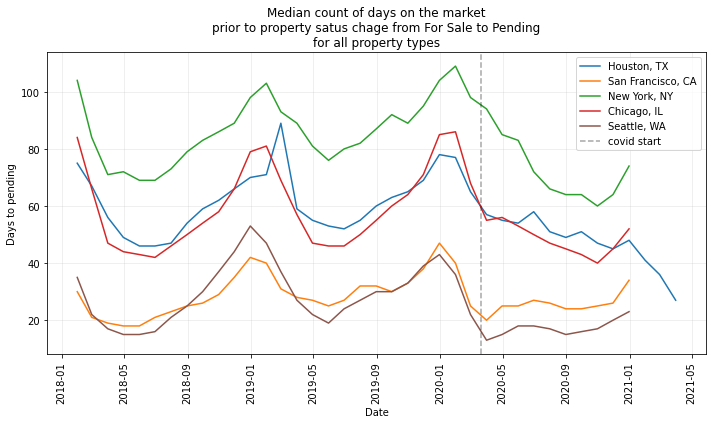

In [22]:
#------------------------ Plotting inventory data - Days to Pending ------------------------ 
# ---------------------------------------- by city -----------------------------------------
plt.figure(figsize=(10, 6))
color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown']
counter=0
for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[
        zillow_df_by_city_merged['City']==city]
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')

#   plt.figure(figsize=(10, 6))
    plt.plot(zillow_df_by_city_merged_dateindex['Date'],
               zillow_df_by_city_merged_dateindex['inventory_d2p_data'],
             color[counter], 
             label=city)
    
    plt.xlabel("Date")
    plt.ylabel("Days to pending")
    plt.title(f"Median count of days on the market\nprior to property satus chage from For Sale to Pending\nfor all property types")
    plt.grid(alpha=0.25)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    counter+=1
    
import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.35, label="covid start", linestyle='--')
plt.legend()
    
city_formatted=city.split(",")[0].replace(" ", "_")

file_name= "inventoryDays2Pending_AllCities"
plt.savefig( "figures/" + file_name +".png")

PROCESSING_______________________Houston, TX
PROCESSING_______________________San Francisco, CA
PROCESSING_______________________New York, NY
PROCESSING_______________________Chicago, IL


<ipython-input-14-edf6113e1415>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
<ipython-input-14-edf6113e1415>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
<ipython-input-14-edf6113e1415>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

PROCESSING_______________________Seattle, WA


<ipython-input-14-edf6113e1415>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


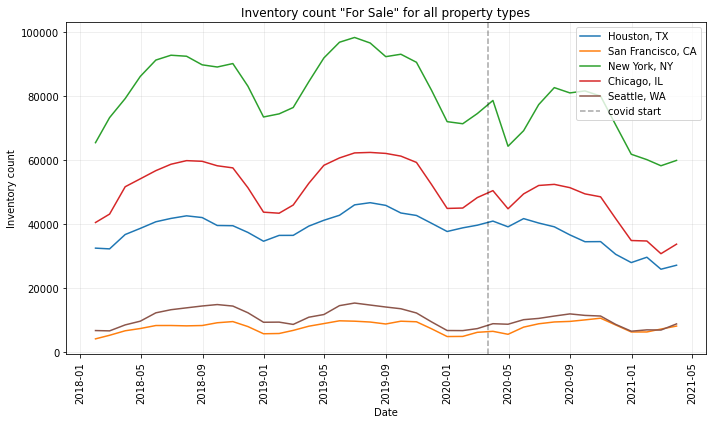

In [14]:
#----------------------------- Plotting inventory FOR SALE data ----------------------------
# ---------------------------------------- by city -----------------------------------------
plt.figure(figsize=(10, 6))
color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown']
counter=0
for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[
        zillow_df_by_city_merged['City']==city]
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')

#   plt.figure(figsize=(10, 6))
    plt.plot(zillow_df_by_city_merged_dateindex['Date'],
               zillow_df_by_city_merged_dateindex['inventory_4s_data'],
             color[counter], 
             label=city)
    
    plt.xlabel("Date")
    plt.ylabel("Inventory count")
    plt.title(f"Inventory count \"For Sale\" for all property types")
    plt.grid(alpha=0.25)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    counter+=1
    
import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.35, label="covid start", linestyle='--')
plt.legend()
    
city_formatted=city.split(",")[0].replace(" ", "_")

file_name= "Inventory4Sale_AllCities"
plt.savefig( "figures/" + file_name +".png")

In [15]:
zillow_df_by_city_merged_dateindex.head()

,City,RegionType,StateName,Date,list_price_data,sale_data,inventory_d2p_data,inventory_4s_data,Year,Month,MonthNumeric,DayOfTheWeek,DayOfTheWeekNumeric
175,"Seattle, WA",Msa,WA,2018-01-31,525000.0,434719.0,35.0,6622.0,2018,Jan,1,Wednesday,3
174,"Seattle, WA",Msa,WA,2018-02-28,559950.0,465000.0,22.0,6523.0,2018,Feb,2,Wednesday,3
173,"Seattle, WA",Msa,WA,2018-03-31,599000.0,475000.0,17.0,8394.0,2018,Mar,3,Saturday,6
172,"Seattle, WA",Msa,WA,2018-04-30,599950.0,499850.0,15.0,9556.0,2018,Apr,4,Monday,1
176,"Seattle, WA",Msa,WA,2018-05-31,599950.0,494719.0,15.0,12175.0,2018,May,5,Thursday,4


PROCESSING_______________________Houston, TX


<ipython-input-31-0b4b34230c71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________San Francisco, CA


<ipython-input-31-0b4b34230c71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________New York, NY


<ipython-input-31-0b4b34230c71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Chicago, IL


<ipython-input-31-0b4b34230c71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Seattle, WA


<ipython-input-31-0b4b34230c71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


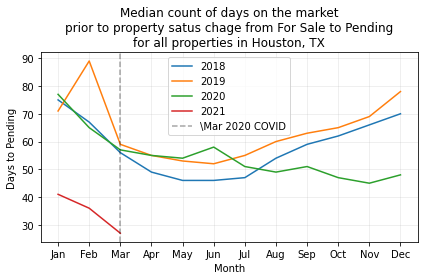

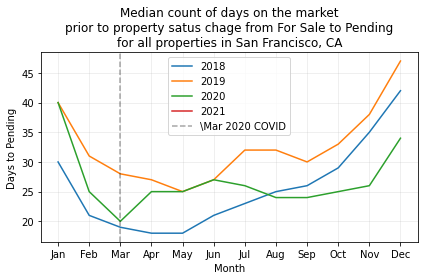

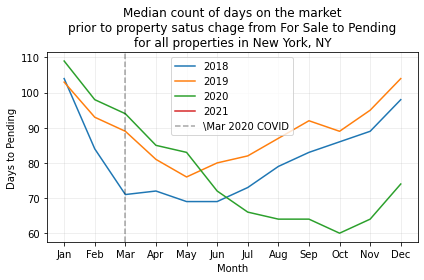

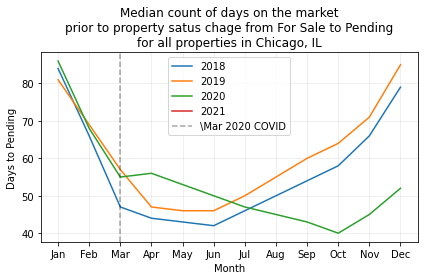

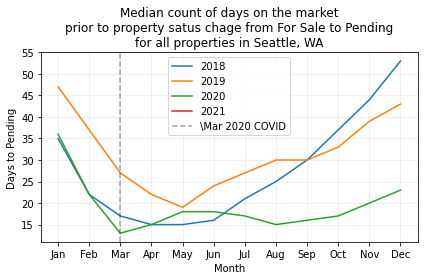

In [31]:
#------------------------ Plotting inventory data - Days to Pending ------------------------ 
# ---------------------------------- by city (seasonally) ----------------------------------

for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[
        zillow_df_by_city_merged['City']==city]
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')
    
    fig, ax = plt.subplots(figsize=(6, 4))
    for label, grp in zillow_df_by_city_merged_dateindex.groupby('Year'):
        grp.plot(x = 'MonthNumeric', y = 'inventory_d2p_data',ax = ax, label = label)
        counter+=1
    plt.xlabel("Month")
    plt.ylabel("Days to Pending")
    plt.title(f"Median count of days on the market\nprior to property satus chage from For Sale to Pending\nfor all properties in {zillow_df_by_city_merged_dateindex['City'].unique()[0]}")
    plt.grid(alpha=0.25)
    
    plt.axvline(3, c='k', alpha=0.35, label="\Mar 2020 COVID", linestyle='--')
    
    plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.tight_layout()
    
    city_formatted=city.split(",")[0].replace(" ", "_")
    
    file_name= "inventoryDays2Pending"
    plt.savefig( "figures/" + file_name + "_vs_month_" + city_formatted +".png")
    counter+=1


PROCESSING_______________________Houston, TX


<ipython-input-32-5aa928f1e43d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________San Francisco, CA


<ipython-input-32-5aa928f1e43d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________New York, NY


<ipython-input-32-5aa928f1e43d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Chicago, IL


<ipython-input-32-5aa928f1e43d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


PROCESSING_______________________Seattle, WA


<ipython-input-32-5aa928f1e43d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')


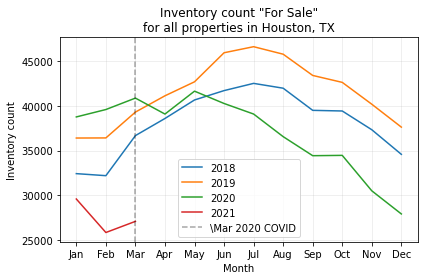

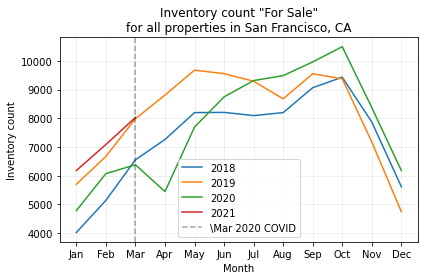

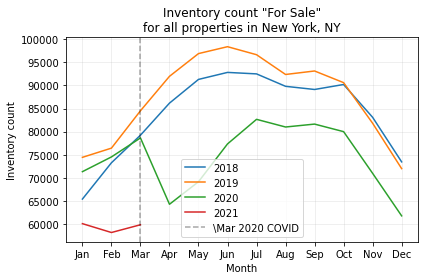

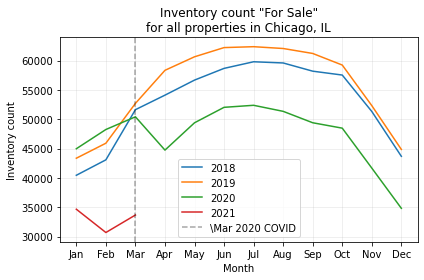

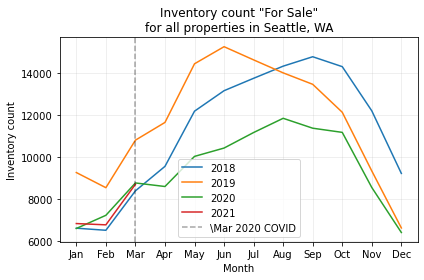

In [32]:
#------------------------ Plotting inventory data - inventory FOR SALE data ------------------------ 
# ---------------------------------- by city (seasonally) ----------------------------------

for city in chosen_cities:
    print(f"PROCESSING_______________________{city}")
    
    # Filter data by specific city name
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged[
        zillow_df_by_city_merged['City']==city]
    #  Sort df by City name and Date
    zillow_df_by_city_merged_dateindex['Date']=zillow_df_by_city_merged_dateindex['Date'].astype('datetime64[ns]')
    zillow_df_by_city_merged_dateindex=zillow_df_by_city_merged_dateindex.sort_values('Date')
    
    fig, ax = plt.subplots(figsize=(6, 4))
    for label, grp in zillow_df_by_city_merged_dateindex.groupby('Year'):
        grp.plot(x = 'MonthNumeric', y = 'inventory_4s_data',ax = ax, label = label)
        counter+=1
    plt.xlabel("Month")
    plt.ylabel("Inventory count")
    plt.title(f"Inventory count \"For Sale\"\nfor all properties in {zillow_df_by_city_merged_dateindex['City'].unique()[0]}")
    plt.grid(alpha=0.25)
    
    plt.axvline(3, c='k', alpha=0.35, label="\Mar 2020 COVID", linestyle='--')
    
    plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.tight_layout()
    
    city_formatted=city.split(",")[0].replace(" ", "_")
    
    file_name= "inventory4Sale"
    plt.savefig( "figures/" + file_name + "_vs_month_" + city_formatted +".png")
    counter+=1


In [25]:
#--------------------------- Analyzing real estate data by county -------------------------- 
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_county=pd.DataFrame(zillow_df[zillow_df['type']=='County'])

counter=0

# Filter out chosen counties
for i, row in zillow_df_by_county.iterrows():
    d=row['data']
    d['Date']=d['Date'].astype('datetime64[ns]')
    d=d.drop(['Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'State'],axis=1)
    county_filter = d['RegionName'].str.upper().isin(chosen_counties)
    state_filter= d['StateName'].str.contains(state)
    zillow_df_by_county.loc[row.name]['data_filtered']=d[(county_filter) & (state_filter)].sort_values(by='Date')
    if counter<1 :
        zillow_df_by_county_merged=zillow_df_by_county.loc[row.name]['data_filtered']
        counter+=1
    else :    
        zillow_df_by_county_merged=pd.merge(zillow_df_by_county_merged,
                                          zillow_df_by_county.loc[row.name]['data_filtered'],
                                          on=['RegionName','RegionType','StateName','Date'])

zillow_df_by_county.head(3)

,url,description,data,type,data_filtered
stat_name,,,,,
zhvi_single_family_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType StateName...
zhvi_condo_coop_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType StateName...
zhvi_5plus_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType StateName...


In [18]:
zillow_df_by_county.loc['zhvi_single_family_homes_by_county']['data_filtered'].head(3)

,RegionName,RegionType,StateName,Date,zhvi_single_family_homes_by_county
2,Harris County,County,TX,1996-01-31,102970.0
106,Fort Bend County,County,TX,1996-01-31,139204.0
142,Montgomery County,County,TX,1996-01-31,146201.0


In [19]:
zillow_df_by_county_merged

,RegionName,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county
0,Harris County,County,TX,1996-01-31,102970.0,88773.0,220080.0,137435.0,88562.0,67359.0,82023.0
1,Fort Bend County,County,TX,1996-01-31,139204.0,101287.0,244549.0,164644.0,94637.0,86009.0,98842.0
2,Montgomery County,County,TX,1996-01-31,146201.0,96672.0,310134.0,192314.0,121039.0,86705.0,64666.0
3,Galveston County,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trinity County,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1515,Galveston County,County,TX,2021-04-30,256492.0,184927.0,453051.0,319846.0,235690.0,203629.0,141268.0
1516,Harris County,County,TX,2021-04-30,227085.0,145058.0,404434.0,270365.0,202258.0,153934.0,123540.0
1517,Fort Bend County,County,TX,2021-04-30,300229.0,207716.0,480672.0,334836.0,229860.0,193111.0,180619.0
1518,Montgomery County,County,TX,2021-04-30,287240.0,191370.0,559065.0,348261.0,238016.0,178602.0,127973.0


In [20]:
zillow_df_by_county_merged['Date']=pd.to_datetime(zillow_df_by_county_merged['Date'])
zillow_df_by_county_merged['Year']=zillow_df_by_county_merged['Date'].dt.year
zillow_df_by_county_merged = zillow_df_by_county_merged.rename(columns = {'RegionName': 'County'})
zillow_df_by_county_merged['County']=zillow_df_by_county_merged['County'].str.upper()
zillow_df_by_county_merged.to_csv("summary_csv/zillow_df_by_county_merged.csv",
                                  index=False)
zillow_df_by_county_merged.head()

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year
0,HARRIS COUNTY,County,TX,1996-01-31,102970.0,88773.0,220080.0,137435.0,88562.0,67359.0,82023.0,1996
1,FORT BEND COUNTY,County,TX,1996-01-31,139204.0,101287.0,244549.0,164644.0,94637.0,86009.0,98842.0,1996
2,MONTGOMERY COUNTY,County,TX,1996-01-31,146201.0,96672.0,310134.0,192314.0,121039.0,86705.0,64666.0,1996
3,GALVESTON COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,TRINITY COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
